In [17]:
import praw


reddit_api = praw.Reddit(
    client_id="1inZ_76TJh31QR_Kb2c9hQ",
    client_secret="WugBMk1q14JVrYGU4uU_xTpSmh90og",
    user_agent="Complex_Pop1588",
)

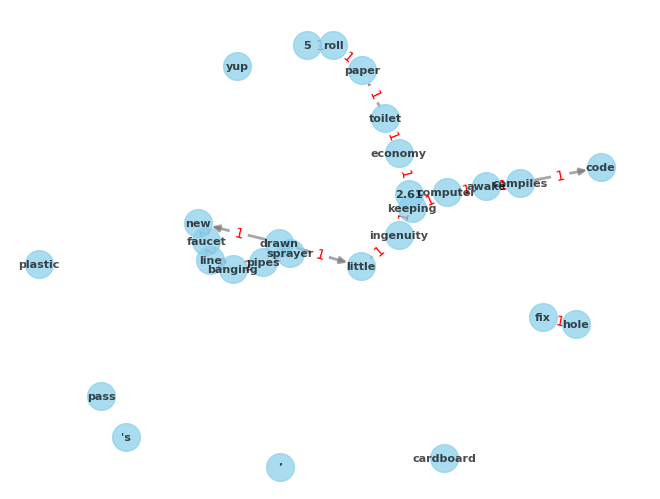

In [18]:
import praw
import nltk
from nltk.corpus import stopwords
import string
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt

# Initialize Reddit API with correct credentials
reddit = praw.Reddit(
    client_id="1inZ_76TJh31QR_Kb2c9hQ",
    client_secret="WugBMk1q14JVrYGU4uU_xTpSmh90og",
    user_agent="Complex_Pop1588",
)
subreddit = reddit.subreddit("RedneckEngineering")

# Initialize NLTK's stopwords list and punctuation
stop_words = set(stopwords.words("english"))
punctuation = set(string.punctuation)
top_posts = subreddit.top(limit=10)

keyword_counter = Counter()
edge_weights = Counter()

for submission in top_posts:
    # Combine the post title and text
    post_text = submission.title + " " + submission.selftext

    tokens = nltk.word_tokenize(post_text.lower())
    filtered_tokens = [word for word in tokens if word not in stop_words and word not in punctuation]
    keyword_counter.update(filtered_tokens)

    # Create edges between consecutive words and update edge weights
    edges = list(zip(filtered_tokens, filtered_tokens[1:]))
    edge_weights.update(edges)

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for keyword, count in keyword_counter.most_common(20):
    G.add_node(keyword, count=count)

for (word1, word2), weight in edge_weights.most_common(20):
    G.add_edge(word1, word2, weight=weight)

# Draw the graph
pos = nx.spring_layout(G, seed=42)  # You can try different layout algorithms
nx.draw(G, pos, with_labels=True, font_size=8, font_color='black', node_size=400, node_color='skyblue', edge_color='gray', font_weight='bold', width=2, alpha=0.7)

# Draw edge labels with weights
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.show()
